In [10]:
# -*- coding:cp949 -*-

import os
import numpy as np
import struct
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt

In [11]:
def getrgb888(r, g, b):
    i = 1
    if r >= g and r >= b:
        i = r / 255 + 1
    elif g >= r and g >= b:
        i = g / 255 + 1
    elif b >= g and b >= r:
        i = b / 255 + 1

    if i != 0:
        r_ = r / i
        g_ = g / i
        b_ = b / i
    else:
        r_ = r
        g_ = g
        b_ = b

    if r_ > 30:
        r_ = r_ - 30
    if g_ > 30:
        g_ = g_ - 30
    if b > 30:
        b_ = b_ - 30

    r_ = r_ * 255 / 225
    g_ = g_ * 255 / 225
    b_ = b_ * 255 / 225

    if r_ > 255:
        r_ = 255
    if g_ > 255:
        g_ = 255
    if b_ > 255:
        b_ = 255

    rgblist = [np.uint8(r_), np.uint8(g_), np.uint8(b_)]
    return rgblist
#raw값을 rgb값으로 변환

In [31]:
curr_path = 'C:/Users/jiyoo/Documents/code/binfiles'
txt_path = os.path.join(os.path.abspath(os.getcwd()), 'tmp_filelist.txt')

dataX, dataY = [], []

with open(txt_path, 'wt') as f:
    for root, dirs, files in os.walk(curr_path):
        if files:
            for file in files:
                if file.find('.bin') > 0:
                    filename = os.path.join(root, file)
                    f.write(filename + '\n')

with open(txt_path, 'r') as file:
    lines = file.readlines()
    lines.sort()
    j = 0;
    for line in lines:
        bfname = ''.join([os.path.splitext(line)[0], '.bin'])
        with open(bfname, 'rb') as BF:
            while True:
                temp = BF.read(1)  # 0x02 (Start of File)
                if not temp: break
                m_AcX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_AcZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                tmp = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyX = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyY = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                m_GyZ = np.int16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_C = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_R = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_G = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                c_B = np.uint16(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                                 (int(struct.unpack('B', BF.read(1))[0]) << 8))
                PPM = np.int(0x0000 | int(struct.unpack('B', BF.read(1))[0]) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 8) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 16) |
                               (int(struct.unpack('B', BF.read(1))[0]) << 24))

                rgb = getrgb888(c_R, c_G, c_B)
                dataX.append(rgb)
                dataY.append(os.path.splitext(os.path.basename(line))[0])
                temp = BF.read(1)  # 0x03 (End of File)
        j += 1

dataX = np.array(dataX)

t = Tokenizer()
t.fit_on_texts(dataY)
dataY_=t.texts_to_sequences(dataY)
dataY = to_categorical(dataY_)
#카테고리에 대한 one-hot encoding

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, shuffle=True, stratify=dataY, random_state=34)

print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(1036, 3)
(260, 3)
(1036, 32)
(260, 32)


In [33]:
model = models.Sequential()
model.add(layers.Dense(64, input_dim=3, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(j, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

hist = model.fit(x_train,
                y_train,
                epochs=500,
                batch_size=32
                )



36/1036 [==============================] - 0s 81us/step - loss: 0.2617 - accuracy: 0.8967
Epoch 314/500
1036/1036 [==============================] - 0s 89us/step - loss: 0.2297 - accuracy: 0.9044
Epoch 315/500
1036/1036 [==============================] - 0s 87us/step - loss: 0.2499 - accuracy: 0.8919
Epoch 316/500
1036/1036 [==============================] - 0s 83us/step - loss: 0.2367 - accuracy: 0.8967
Epoch 317/500
1036/1036 [==============================] - 0s 69us/step - loss: 0.2425 - accuracy: 0.8996
Epoch 318/500
1036/1036 [==============================] - 0s 67us/step - loss: 0.2464 - accuracy: 0.9035
Epoch 319/500
1036/1036 [==============================] - 0s 94us/step - loss: 0.1973 - accuracy: 0.9131
Epoch 320/500
1036/1036 [==============================] - 0s 57us/step - loss: 0.2692 - accuracy: 0.9044
Epoch 321/500
1036/1036 [==============================] - 0s 61us/step - loss: 0.2118 - accuracy: 0.9035
Epoch 322/500
1036/1036 [==============================] - 0s 

In [34]:
model.evaluate(x_test, y_test, batch_size=32)
result = model.predict(x_test, batch_size=32)
print(result.shape)


260/260 [==============================] - 0s 245us/step
(260, 32)


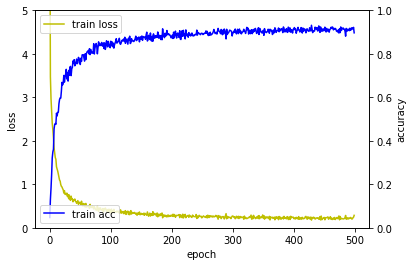

In [35]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 5.0])
acc_ax.set_ylim([0.0, 1.0])
print(hist)

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()